# NLP-Based GitHub Language Predictor Project

- This project is designed to automatically identify the primary programming language used in a GitHub repository by analyzing the text in its README file. By harnessing the power of Natural Language Processing (NLP) and machine learning, we aim to make it easier for users to understand the technology stack of a project.


# Goal

- Develop a machine learning model model that can predict the main programming language of a repository, given the text of the README file.

# Imports

In [1]:
# local imports
# import config as c
import acquire as a
import prepare as p
import explore as e
import visual as v
import model as m

# variable for API TOKEN access
# api_token = c.GITHUB_API_TOKEN

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jongarcia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Acquire

- Data acquired from GitHub's API using API token and written to a csv file.
- Data initially acquired on 19 Oct, 2023.
- It contained 677 rows and 3 columns before cleaning.
- Each row represents a unique repository for repositories starred more than 200 times and based on robotics projects.
- The columns (repos, readme) represented the label and text associated for each repo.

# Prepare

## Data Preprocessing Steps

### **Replacing Null/NaN Values:**
   - no null values were replaced.

###  **Column Renaming:**
   - renamed reame_contents column to shorten.

###  **Column Removal:**
   - Removed columns that did not contain useful information:
     - Columns with repo names
         - Repo names were used to retrieve text language and text data so it was no longer needed after retrieval.

### **Row Handling:**
   - All rows were revised and html tags, links, and other characters that were not useful were dropped.
   - Decreased feature space from 677 to 609 observation.

### **Data Type Validation:**
   - Checked and ensured that column data types were appropriate.

### **Feature Engineering:**
   - Bigrams, Trigrams as new features

### **Data Splitting:**
   - Split the data into three sets for modeling: training, validation, and test, with an approximate split of 70/15/15.

In [2]:
# acquired and prepped data
repos_df = a.text_data()

### Quick view of data,

In [3]:
# First 5 rows of data
repos_df.head()

,repo,language,text,bigrams,trigrams
0,AtsushiSakai/PythonRobotics,Python,pythonrobotics githubactionlinuxci githubactio...,path_planning grid_based path_tracking steerin...,pythonroboticsfigure1png_master_atsushisakaipy...
2,NxRLab/ModernRobotics,Python,modern robotics mechanic planning control code...,modern_robotics robotics_mechanic mechanic_pla...,modern_robotics_mechanic robotics_mechanic_pla...
4,onlytailei/CppRobotics,C++,cpprobotics cpp implementation pythonrobotics ...,red_circle black_line steering_control point_r...,speed_steering_control black_line_planned line...
5,JdeRobot/RoboticsAcademy,Other,roboticsacademy learn robotics artificial inte...,learn_robotics mini_radi roboticsacademy_learn...,roboticsacademy_learn_robotics learn_robotics_...
6,pptacher/probabilistic_robotics,C++,probabilisticrobotics working detailed solutio...,probabilistic_robotics victoria_park park_data...,victoria_park_dataset probabilisticrobotics_wo...


### Distribution of Repo Data

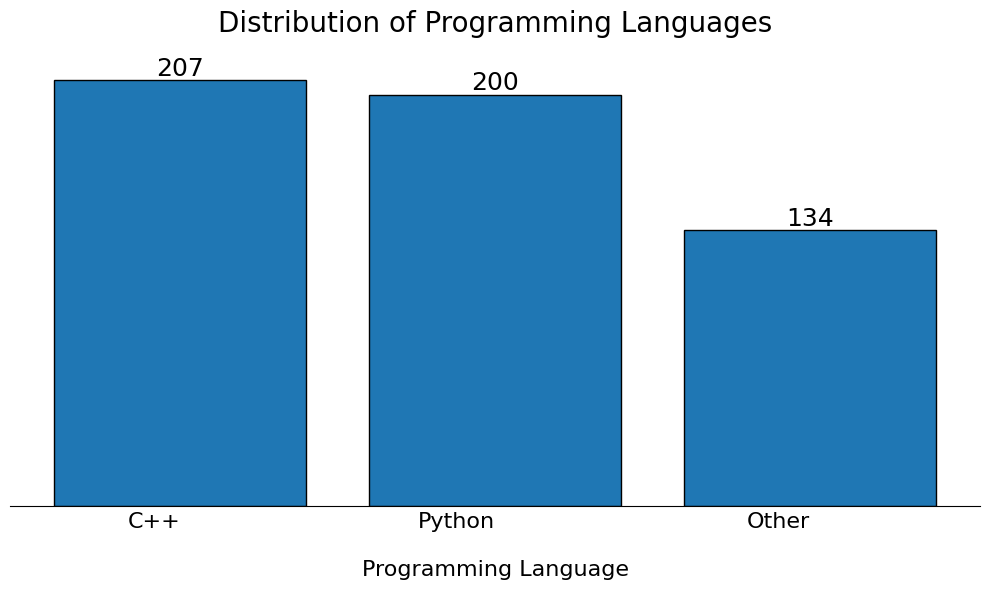

In [4]:
# Counts and ratios of language labels in a DataFrame
# Visualize the distribution
e.vis_1(repos_df)

# Explore

* What are the top 10 words for any language?
* Is there a significant difference in the frequency of the top 10 words used in repository descriptions among different languages?
* Is there a significant association between the programming language and the likelihood that readme contains the word "build"?
* What are the top ten bigrams for python?
* What are the top 10 trigrams for C++?

# Question 1. - **Is there a significant difference in the frequency of the top 10 words used in repository descriptions among different languages?**

- **Null Hypothesis($H0$):** There is **no difference** in the frequency of the top 10 words used in repository descriptions among the repositories with different languages.

- **Alternative Hypothesis($Ha$):** There **is a significant difference** in the frequency of the top 10 words used in repository descriptions among the repositories with different languages.  

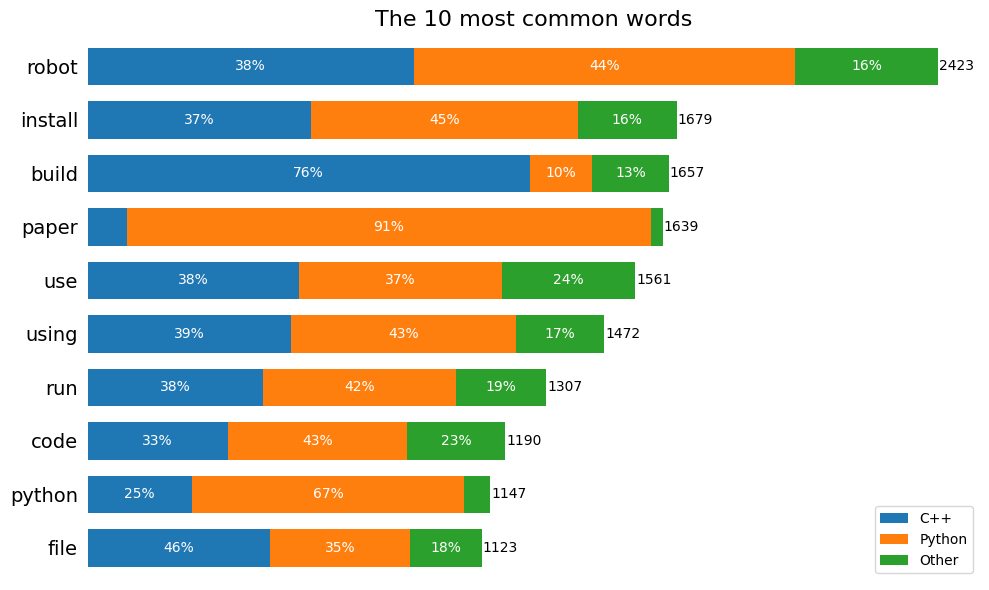

Chi-square Statistic: 2878.350562094149
p-value: 0.0
We reject the null hypothesis.


In [ ]:
# Plot the top 10 words of all languages
# Perform a chi2 test
e.q1_vis_test(repos_df, alpha=0.05)

### **Takeaway:** 
### There **is a significant difference** in the frequency of the top 10 words used in repository descriptions among the repositories with different languages.

___

# Question 2. - **Is there a significant association between the programming language and the likelihood that readme contains the word "build"?**  

- **Null Hypothesis($H0$):** There is **no association** between a repository's programming language and the presence of the word "build" in its README.

- **Alternative Hypothesis($Ha$):** There is a **significant association** between a repository's programming language and the presence of the word "build" in its README. 

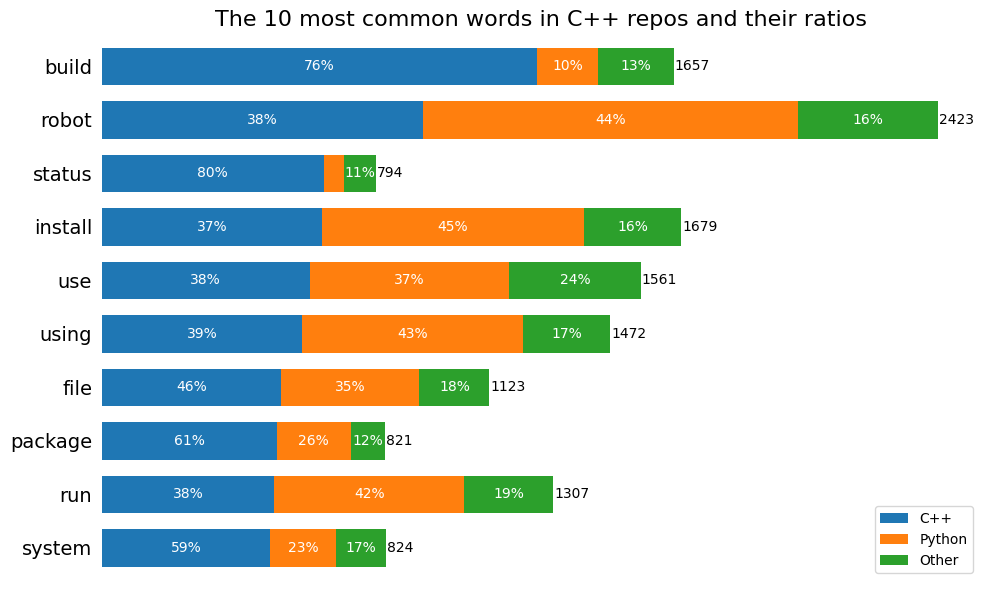

Chi-square Statistic: 76.39034483925082
p-value: 2.327866422955486e-18
We reject the null hypothesis.


In [ ]:
# Plot the top 10 words in C++ repos
# Perform a chi2 test
e.q2_vis_test(repos_df, alpha=0.05)

### **Takeaway:** 
### There is a **significant association** between a repository's programming language and the presence of the word "build" in its README.

___

# Question 3. - **What are the top ten bi-grams for python?**  


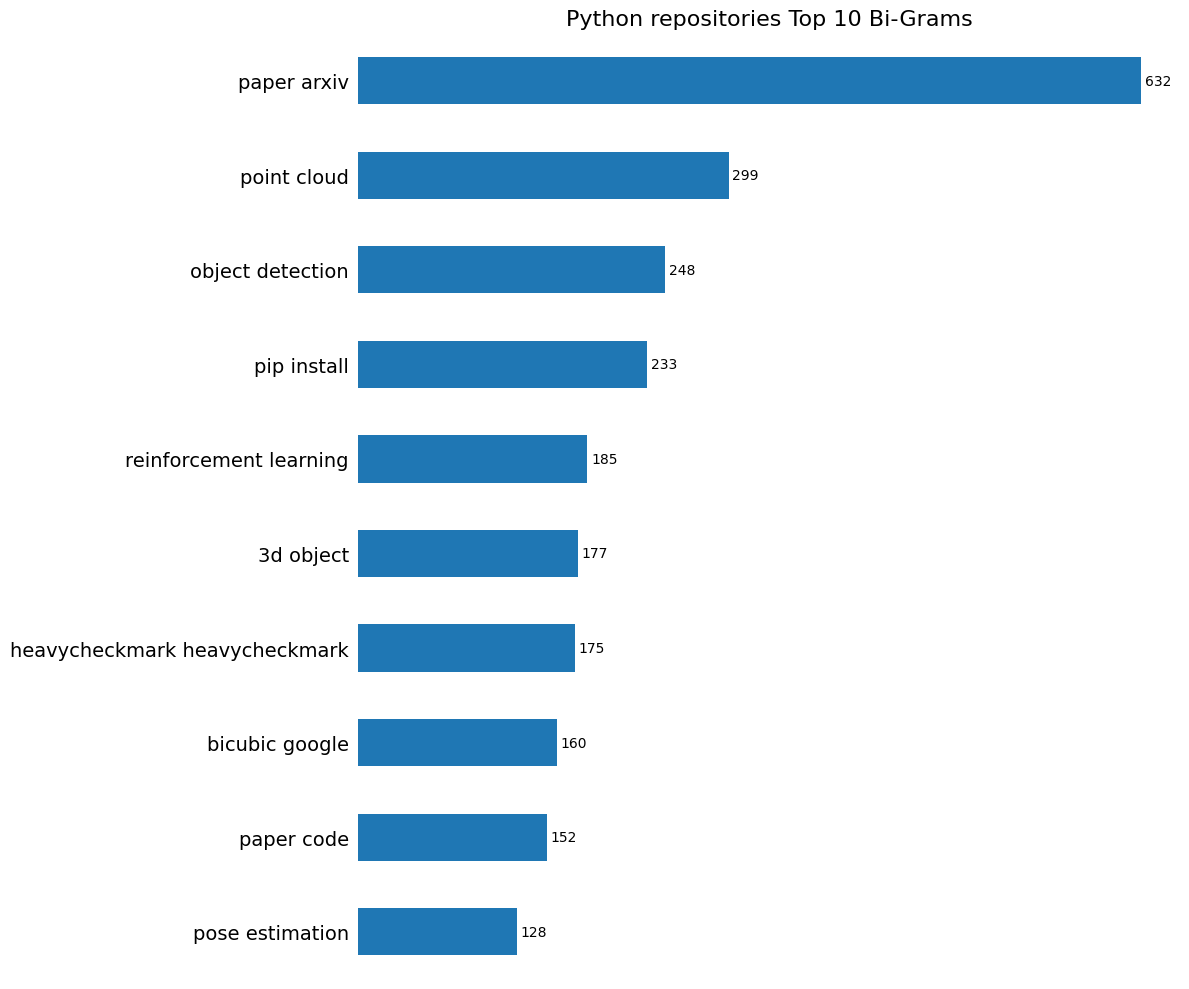

In [ ]:
e.vis_4(repos_df, "Python repositories Top 10 Bi-Grams")

### **Takeaway:** 
### Paper and arXiv is the most popular Bi-gram on Python repos likely because arXiv host scholarly articles in the fields of physics, mathematics and computer science. Based on the top 10 words in all languages, we can see that Python repos often site arXiv papers

___

# Question 4. - **What are the top 10 trigrams for C++?**  


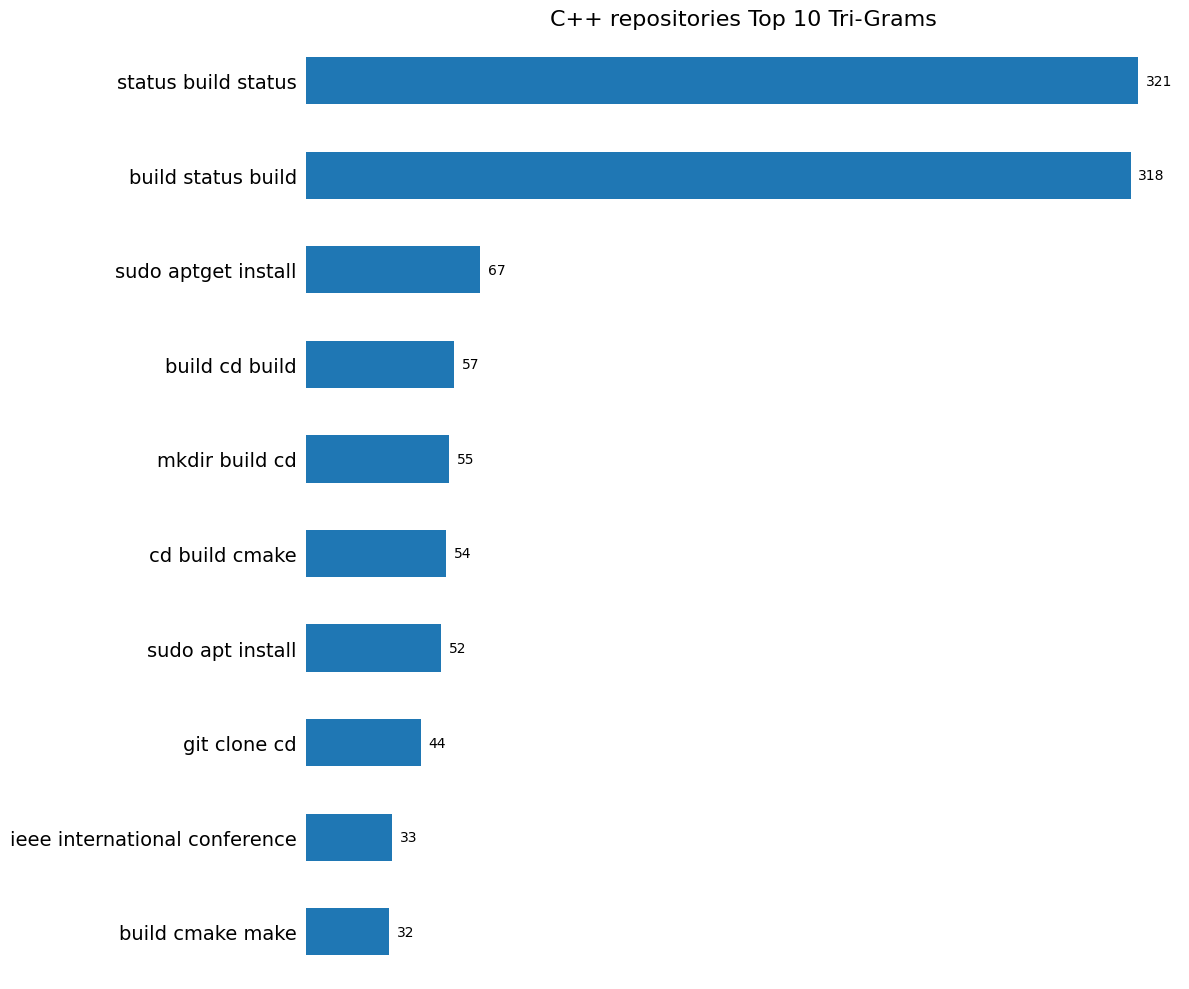

In [ ]:
e.vis_5(repos_df, "C++ repositories Top 10 Tri-Grams")

### **Takeaway:** 
### It is strange that the top two Tri_grams for C++ is "status build status" and its inverse "built status build"

# Explore Summary

- The words have a fairly equal distribution for each programming language.
- There is heavy use of C++ and Python in robotics related repositories on github that are most frequently starred.
- 

# Features for modeling

### **Features that will be used:**
* *Language*(target)  
* *text*

# Modeling

### Evaluation Metric
- The primary evaluation metrics for the models are:
  - Accuracy
    
### Data Expansion
- Given more time, additional data could be gathered to improve model performance.
- Experimentation with hyperparameter configurations can lead to better classification report metrics.

### Target Feature
- The target feature for the models is `Language`.

### Baseline accuracy
- The baseline accuracy is 39%.

### Models and Hyperparameters
- Multiple sets of hyperparameters will be used for model development, each optimized on features listed:
  1. Logistic Regression (Hyperparameter Tuned)
  2. KNearest Neighbors (Hyperparameter Tuned)
  3. XGBoostClassifier (Hyperparameter Tuned)

### Model Evaluation
- Models will be developed and evaluated on the training and validation datasets.

### Final Model Selection
- The best-performing model, as determined by RMSE and Model Significance on the validation set, will be selected.

### Test Dataset
- The selected best model will be evaluated on the test dataset for final performance assessment.


## Baseline Model Accuracy Score

In [26]:
# baseline
m.baseline()



Baseline Accuracy


Train baseline accuracy: 39%


Validation baseline accuracy: 37%



## Best of 3 model configurations

## Model 1

In [27]:
### Logisitc Regression Model
m.model_1()



Logisitic Regression Model (Hyperparameters Used)

Train Accuracy: 0.97


Validation Accuracy: 0.78



## Model 2

In [32]:
### KNNClassifier Model
m.model_2()



KNearest Neighbors (Hyperparameters Used)

Train Accuracy: 1.00


Validation Accuracy: 0.63



## Model 3

In [30]:
### XGB Classifier Model
m.model_3()



XGBClassifier Model (Hyperparameters Used)

Train Accuracy: 1.00


Validation Accuracy: 0.75



## Best on Test

#### - **Logistic Regression model**

In [31]:
# Final Model
m.model_4()



Final Model Logisitic Regression with Hyperparameter tuning

Train Accuracy: 0.97


Validation Accuracy: 0.78


Test Accuracy: 0.74



# Model Summary

### Logistic Regression Model
- The Logistic Regression model was overfitting, but with hyperparameter tuning it performed the best with the following,


- ***Test Set Accuracy metric:*** $0.74$

### KNearest Neighbors Classifier Model
- The Polynomial Features LinearRegression model exhibited better generalization, but it had poor R2 scores.

### XGBClassifier Model
- The XGBRegressor model was also overfit, but even withyperparameter tunning it did not do as well on validation.

# Conclusion

## Takeaways and Key Findings

- The words in the readme texts have alot of words that can be considered noise because of it's equal dsitribution for each language type.
- There bigrams and trigrams displayed more noise and opportunity to conduct more cleaning actions to possibily impprove model by including those engineered features.
- The topic of robotics across popular repos shows that Python and C++ werethe most popula languages used in the data retreived.
- The langauge feature contained alot of technologies and not actual programming languages which can skew the data displayed.

## Model Improvement
- The model could include those unused feature engineered columns to evaluate model performance changes.

# Recommendations and Next Steps

- We recommend revisiting the labeling of the programming langauges for each repository as they are not storing accurate information. We understand that there are debates on what is and is not considere a "real programming' language, but there is a distinction on what technologies are being used specifically and it should be easy to understand that when 

- Given more time, the following actions could be considered:
  - Gather more data to improve model performance.
  - We could retrieve more data and approach our web scrapping methods using other technologies.
    - The url location was using the website filter option and we could possibily remove that and use stars as a feature to improve results
  - Fine-tune model parameters for better performance.